In [95]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\admin\\Downloads\\Data.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [96]:
df.head()


Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

In [97]:
df

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [98]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [99]:
df = df.replace('?',np.nan) #replaces ? with NaN

In [100]:
df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean

C:\Users\admin\AppData\Local\Temp\ipykernel_20600\988707908.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean


In [101]:
df.head()

Country   Age        Salary Purchased
0   France  44.0  72000.000000        No
1    Spain  27.0  48000.000000       Yes
2  Germany  30.0  54000.000000        No
3    Spain  38.0  61000.000000        No
4  Germany  40.0  63777.777778       Yes

In [102]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Country']=le.fit_transform(df['Country']) 
df['Country']

0    0
1    2
2    1
3    2
4    1
5    0
6    2
7    0
8    1
9    0
Name: Country, dtype: int32

In [103]:
df

Country        Age        Salary Purchased
0        0  44.000000  72000.000000        No
1        2  27.000000  48000.000000       Yes
2        1  30.000000  54000.000000        No
3        2  38.000000  61000.000000        No
4        1  40.000000  63777.777778       Yes
5        0  35.000000  58000.000000       Yes
6        2  38.777778  52000.000000        No
7        0  48.000000  79000.000000       Yes
8        1  50.000000  83000.000000        No
9        0  37.000000  67000.000000       Yes

In [104]:
df['Purchased'].value_counts() 

No     5
Yes    5
Name: Purchased, dtype: int64

In [105]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_20600\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Country       Age    Salary
Country  1.000000 -0.375150 -0.562083
Age     -0.375150  1.000000  0.912577
Salary  -0.562083  0.912577  1.000000

In [106]:
x = df.drop(['Purchased'],axis=1)
#x=df.iloc[:,0:2]
y=df['Purchased']
obj=StandardScaler()
x=obj.fit_transform(x)
le.fit_transform(['Yes','No'])
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
print(knn.score(xtest,ytest))

0.6666666666666666


In [115]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred=knn.predict(xtest)
confusion_matrix(ytest,ypred)


array([[0, 1],
       [0, 2]], dtype=int64)

In [116]:
k_range=range(1,6)
error1={}
errorlist=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    error1[k]=1-metrics.accuracy_score(ytest,ypred)
    errorlist.append(1-metrics.accuracy_score(ytest,ypred))

Text(0, 0.5, 'Error')

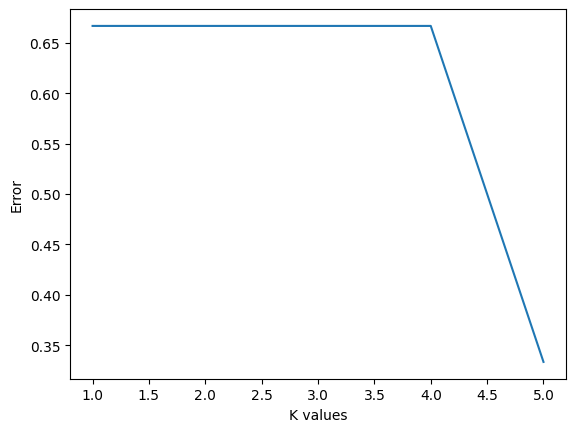

In [117]:
import matplotlib.pyplot as plt
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")